<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> Introduction  To Heart Disease</div>


<span style="font-size: 14px; font-family: Verdana; border: 2px solid #ccc;; padding: 10px; border-radius: 10px; display: inline-block; margin-bottom: 20px;">
Trong notebook này, chúng ta sẽ khám phá cách mà học máy có thể hỗ trợ dự đoán nguy cơ bệnh tim dựa trên dữ liệu bệnh nhân. Chúng ta bắt đầu với Phân tích Dữ liệu Khám phá (EDA) để hiểu rõ bộ dữ liệu và xử lý các giá trị bị thiếu. Chúng ta sẽ thực hiện kỹ thuật kỹ thuật đặc trưng và mã hóa nhãn để chuẩn bị dữ liệu cho mô hình.</br>

Để đảm bảo dữ liệu phù hợp với mô hình, chúng ta sẽ thực hiện phân tích thống kê bằng cách sử dụng QQ-plots và bài kiểm tra Shapiro-Wilk để kiểm tra tính chuẩn. Sau đó, chúng ta sẽ huấn luyện và đánh giá một số mô hình học máy bao gồm SVM, Cây quyết định, Rừng ngẫu nhiên và Hồi quy logistic, sử dụng tối ưu hóa siêu tham số để cải thiện hiệu suất.

Cuối cùng, chúng ta sẽ đánh giá các mô hình bằng các chỉ số đánh giá khác nhau như độ chính xác, độ chính xác (precision), độ nhạy (recall) và ROC-AUC, nhằm cung cấp một công cụ hiệu quả cho chẩn đoán bệnh tim sớm.
</span>

<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 📝NoteBook Outlines📝</div>


<div style="font-size: 18px; font-family: Verdana; border: 2px solid #ccc; background-color: #F5F5F5; padding: 10px; border-radius: 10px; margin-bottom: 20px; position: relative;"><centre>

  <!-- Add the image inside the div, aligned to the right-center -->
 

  <span style="color: #22177A; font-weight: bold;">What’s Inside? Let’s Dive In! </span><centre>
  <ol>
    <li><a href="#1">Data Understanding</a></li>
    <li><a href="#2">Data Preprocessing </a></li>
    <li><a href="#3">Exploratory Data Analysis </a></li>
    <li><a href="#4">Statistical Analysis </a></li>
    <li><a href="#5">Feature Engineering  & Scaling</a></li>
    <li><a href="#6">Feature Importance Using Inferential Statistics</a></li>
    <li><a href="#7">Model Building </a></li>
    <li><a href="#8">Hyper  Parameter Tunning</a></li>
    <li><a href="#9">Modelling-by-Bagging</a></li>
    <li><a href="#10">Model-Evaluation </a></li>
    <li><a href="#11">Model-Submission </a></li>
    <li><a href="#12">Author's Note </a></li>
  </ol>
</div>


<a id="1"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Data Understanding🧩</div>


<a id="1.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Import Necessary Libraries</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler , MinMaxScaler

<a id="1.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Read And Understand Dataset</div>


In [2]:
df = pd.read_csv('heart_disease_data.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
print(f'The Shape of dataset is {df.shape}')

The Shape of dataset is (918, 12)


In [5]:
df.columns.tolist()

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<a id="2"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Data Preprocessing🧩</div>


<a id="2.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Split categorical and numerical data</div>


In [7]:
categorical_data = df.select_dtypes(include=['object'])
numerical_data = df.select_dtypes(include=['int64', 'float64'])
categorical_data.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [8]:
numerical_data= numerical_data.drop(['HeartDisease'], axis=1)
numerical_data.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [9]:
print(categorical_data.describe())

        Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460


In [10]:
print(numerical_data.describe().T)

             count        mean         std   min     25%    50%    75%    max
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS    918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak      918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2


<a id="2.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Unique Values - Giá trị duy nhất</div>


In [11]:
def unique_values(df):
  df_unique_values = df.apply(lambda col: col.nunique())
  df_cnt = pd.DataFrame(df_unique_values, columns=['unique_values'])
  return df_cnt

unique_values(df)

,unique_values
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


| **Mã Code**  | **Giải Thích** |
|--------------|----------------|
| `def unique_values(df):` | Định nghĩa hàm `unique_values` nhận đối số là `df` (DataFrame). |
| `df_unique_values = df.apply(lambda col: col.nunique())` | Áp dụng hàm `lambda` để tính số giá trị duy nhất trong mỗi cột của DataFrame `df`. |
| `df_cnt = pd.DataFrame(df_unique_values, columns=['unique_values'])` | Chuyển kết quả vào một DataFrame mới với cột `'unique_values'` chứa số lượng giá trị duy nhất. |
| `return df_cnt` | Trả về DataFrame `df_cnt` chứa số lượng giá trị duy nhất cho mỗi cột. |

### **Tóm tắt:**
Hàm `unique_values` tính số lượng các giá trị duy nhất trong mỗi cột của DataFrame và trả về kết quả dưới dạng một DataFrame với cột `'unique_values'`.


<a id="2.3"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Handling Missing and Duplicate Values</div>


In [12]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.dropna(axis=0 , inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(918, 12)

<a id="3"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);">🧩ExploratoryData Analysis (EDA)🧩</div>


<a id="3.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Target Variable Analysis</div>


In [15]:
target_cnt= df['HeartDisease'].value_counts().reset_index()
target_cnt.columns = ['HeartDisease', 'Count']
target_cnt.sort_values(by='HeartDisease', inplace=True)
target_cnt["Percentage"] =(round((target_cnt["Count"] / target_cnt["Count"].sum()) * 100))

target_cnt

,HeartDisease,Count,Percentage
1,0,410,45.0
0,1,508,55.0


In [16]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


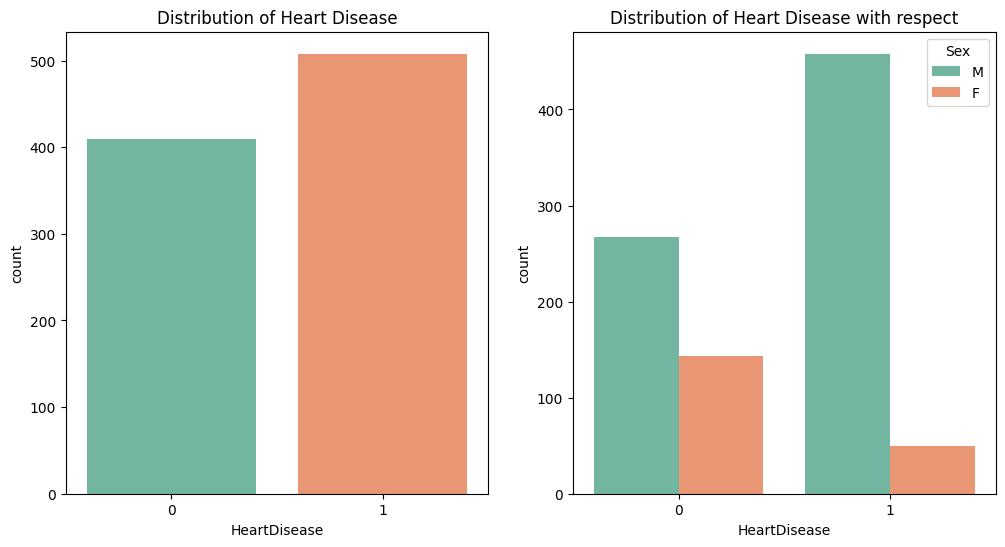

In [17]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x='HeartDisease', data=df, palette='Set2', ax=axes[0])
sns.countplot(x='HeartDisease', data=df, palette='Set2', hue = 'Sex', ax=axes[1])
axes[0].set_title('Distribution of Heart Disease')
axes[1].set_title('Distribution of Heart Disease with respect')
plt.show()

<a id="3.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Univariate Analysis</div>


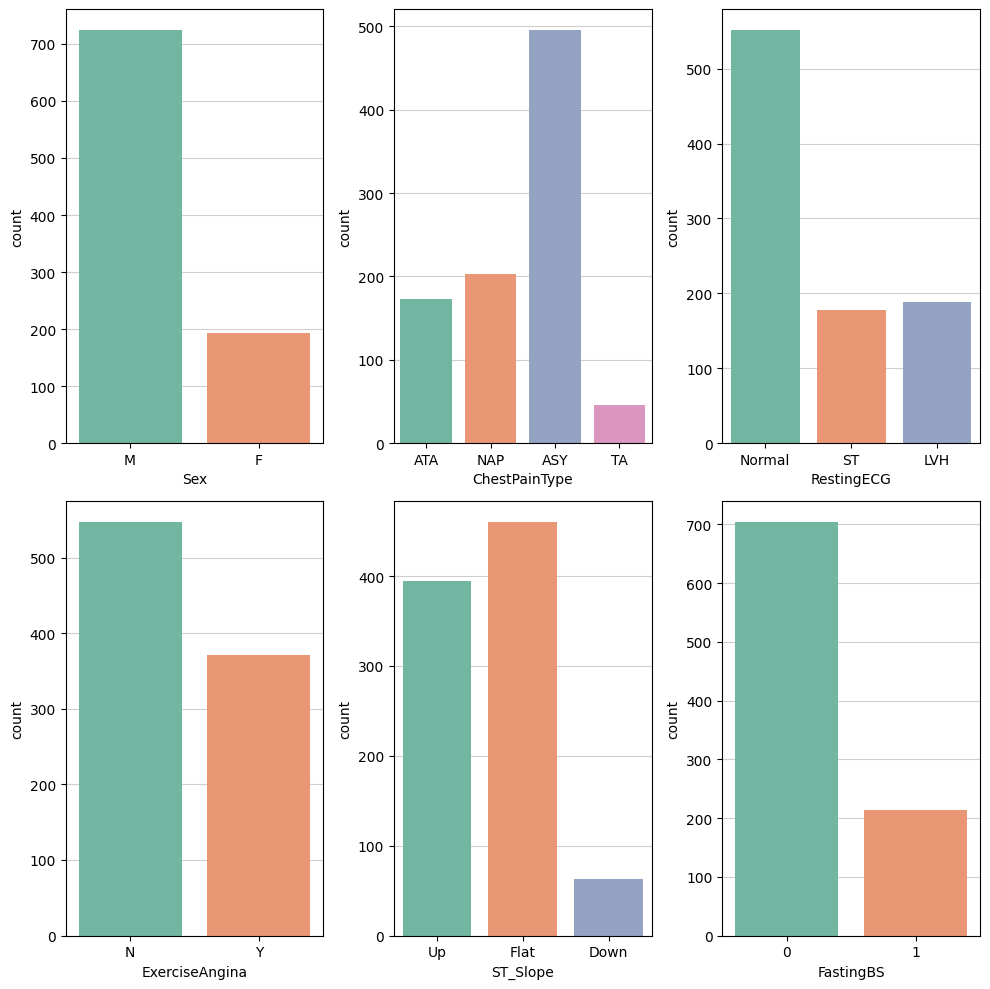

In [18]:
# Vẽ biểu đồ cột bằng seaborn cho các cột dữ liệu sau trong 1 biểu đồ:
col1 = df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']]

fig, axes = plt.subplots(2, 3, figsize=(10, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Chuyển 2D array thành 1D list

for i, col in enumerate(col1.columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2', zorder = 2)
    axes[i].grid(axis='y', alpha=0.6, zorder = 0)    
plt.tight_layout()  # Tự động căn chỉnh layout

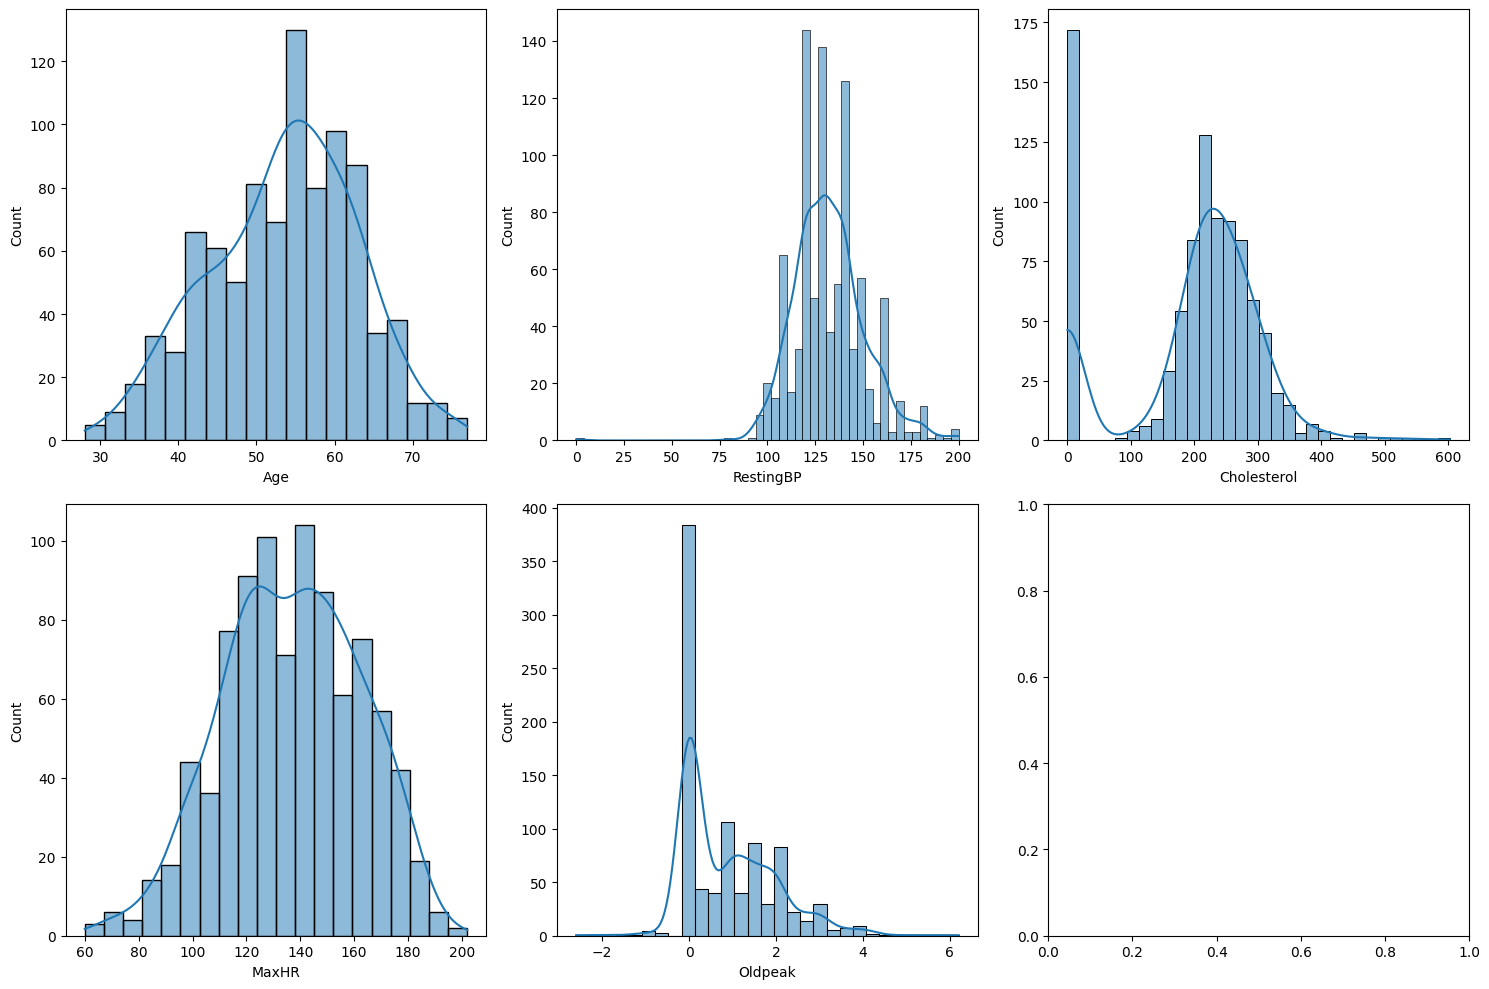

In [19]:
# Vẽ biểu đồ Histogram bằng seaborn cho các cột dữ liệu sau trong 1 biểu đồ:
col2 = df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 hàng, 3 cột
axes = axes.flatten()  # Chuyển 2D array thành 1D list

for i, col in enumerate(col2.columns):
    sns.histplot(data=df, x=col, ax=axes[i], zorder = 2, kde = True) 
plt.tight_layout()  # Tự động căn chỉnh layout

<a id="observations"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Những Quan Sát Quan Trọng
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f0f8ff; padding: 15px; border-radius: 8px; border: 1px solid #bbb; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: disc; padding-left: 20px; color: #333;">
    <li><b>Tuổi:</b> Phân phối gần như chuẩn, với đa số các cá nhân trong độ tuổi <b>40 đến 60</b> năm.</li>
    <li><b>Giới tính:</b> Bộ dữ liệu chứa nhiều <b>nam (M)</b> hơn <b>nữ (F)</b>.</li>
    <li><b>Loại Đau Ngực (ChestPainType):</b> Trong các danh mục (<b>ATA, NAP, ASY, TA</b>), danh mục "<b>ASY</b>" xuất hiện phổ biến nhất, cho thấy nhiều người có thể gặp phải triệu chứng không điển hình.</li>
    <li><b>Huyết áp khi nghỉ (RestingBP):</b> Các giá trị tập trung quanh <b>120 mmHg</b>, với một chút lệch về phía các chỉ số cao hơn.</li>
    <li><b>Cholesterol:</b> Dữ liệu theo phân phối gần chuẩn, với phần lớn các giá trị nằm trong khoảng <b>150 đến 300 mg/dL</b>, cho thấy mức cholesterol thay đổi trong dân số.</li>
    <li><b>Đường huyết lúc đói (FastingBS):</b> Hầu hết mọi người trong bộ dữ liệu có đường huyết lúc đói dưới <b>1</b>, cho thấy mức đường huyết lúc đói thường ở mức bình thường.</li>
    <li><b>ECG khi nghỉ:</b> Phần lớn rơi vào danh mục "<b>Normal</b>", với ít trường hợp ở các danh mục "<b>ST</b>" hoặc "<b>LVH</b>."</li>
    <li><b>Tốc độ tim tối đa đạt được (MaxHR):</b> Phân phối đạt đỉnh vào khoảng <b>140-160 nhịp/phút</b>, chỉ ra giới hạn nhịp tim điển hình trong quá trình gắng sức.</li>
    <li><b>Đau thắt ngực do tập thể dục (ExerciseAngina):</b> Hầu hết các cá nhân không gặp phải đau thắt ngực do tập thể dục, như được chỉ ra bởi sự chiếm ưu thế của danh mục "<b>N</b>".</li>
    <li><b>Oldpeak (Suy giảm ST):</b> Hầu hết các giá trị gần <b>0</b>, cho thấy kết quả ECG tập thể dục khá bình thường cho nhiều người tham gia.</li>
    <li><b>Độ dốc ST:</b> "<b>Phẳng</b>" là loại độ dốc phổ biến nhất, theo sau là "<b>Up</b>", chỉ ra sự biến đổi trong các mẫu ECG.</li>
    <li><b>Bệnh tim:</b> Biến số mục tiêu có phân phối <b>hai đỉnh</b>, chỉ ra cả trường hợp có và không có bệnh tim.</li>
</ul>
</div>


<a id="3.3"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Pair-Plot</div>


<Figure size 500x500 with 0 Axes>

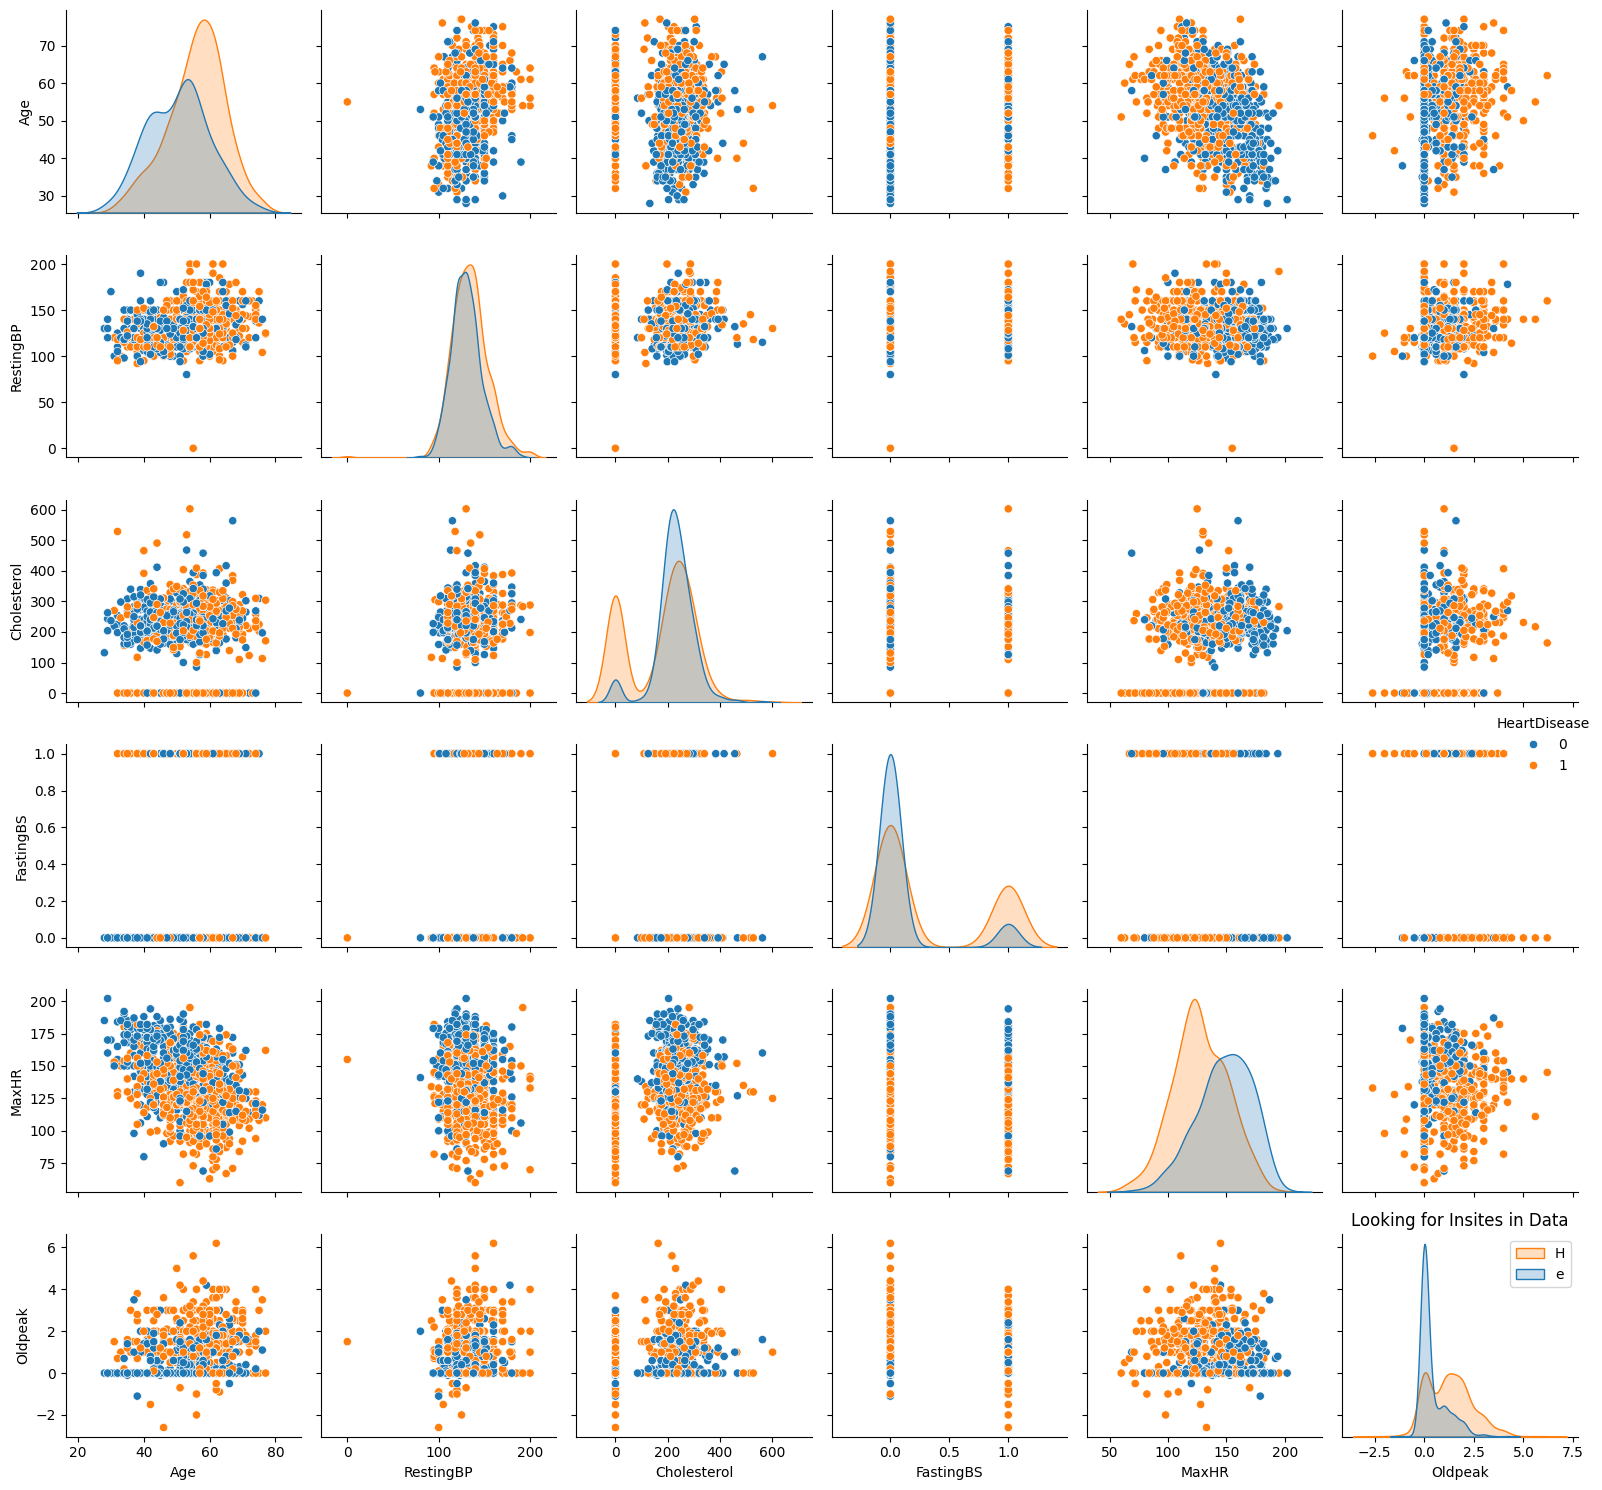

In [20]:
plt.figure(figsize=(5,5))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.show()

<a id="insights"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Key Insights
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f0f8ff; padding: 15px; border-radius: 8px; border: 1px solid #bbb; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: decimal; padding-left: 20px; color: #333;">
    <li><b>Tuổi:</b> Những người có bệnh tim (điểm màu cam) có xu hướng tập trung ở các nhóm tuổi lớn hơn, trong khi những người không có bệnh tim (điểm màu xanh dương) phân bố đều hơn trên phạm vi độ tuổi.</li>
    <li><b>Huyết áp khi nghỉ (RestingBP):</b> Không có mô hình rõ ràng nào phân biệt các nhóm bệnh tim và không có bệnh tim dựa trên RestingBP, điều này cho thấy đây có thể không phải là một yếu tố dự đoán độc lập mạnh.</li>
    <li><b>Cholesterol:</b> Mức cholesterol có phạm vi rộng cho cả hai nhóm, nhưng bệnh nhân có bệnh tim có mức cholesterol cao hơn một chút trung bình.</li>
    <li><b>Đường huyết lúc đói (FastingBS):</b> FastingBS có giá trị nhị phân (0 hoặc 1). Một tỷ lệ lớn hơn những người có bệnh tim có mức đường huyết lúc đói cao (giá trị là 1).</li>
    <li><b>Tốc độ tim tối đa đạt được (MaxHR):</b> Một sự phân biệt rõ ràng được quan sát ở đây: những người không có bệnh tim có xu hướng đạt được nhịp tim tối đa cao hơn so với những người có bệnh tim, điều này làm cho nó trở thành một đặc trưng dự đoán mạnh tiềm năng.</li>
    <li><b>Oldpeak:</b> Oldpeak (có thể là sự suy giảm ST) có giá trị cao hơn rõ rệt đối với những người có bệnh tim, như được chỉ ra bởi sự tập trung của các điểm màu cam ở phạm vi cao hơn.</li>
</ul>

<h4 style="color: #333;">Mối Quan Hệ Tổng Quan:</h4>
<p style="color: #333;">Các biểu đồ phân tán cho thấy sự tương quan giữa một số biến. Ví dụ, <b>Tuổi</b> và <b>MaxHR</b> cho thấy xu hướng âm cho cả hai nhóm, với những người lớn tuổi thường đạt được nhịp tim tối đa thấp hơn. <b>Cholesterol</b> và <b>RestingBP</b> không cho thấy bất kỳ mối quan hệ rõ ràng nào với các biến khác.</p>

<h4 style="color: #333;">Các Biến Dự Đoán:</h4>
<p style="color: #333;"><b>MaxHR</b>, <b>Tuổi</b>, <b>Oldpeak</b>, và <b>FastingBS</b> có vẻ là những biến có sự phân biệt rõ rệt giữa những người có và không có bệnh tim, cho thấy chúng có thể là những yếu tố dự đoán mạnh trong mô hình phân loại.</p>
</div>



In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots # Import the make_subplots function

In [22]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Giả sử bạn có DataFrame 'df' với các cột 'HeartDisease' và các cột đặc trưng số học
num_features = numerical_data.columns.tolist()
num_plots = len(num_features)

n_cols = 2  
n_rows = (num_plots + n_cols - 1) // n_cols 

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=[f"Distribution of {col}" for col in num_features])

# Chỉnh màu sắc nhẹ nhàng, dễ nhìn
colors = ['#1f77b4', '#ff7f0e']  # Màu sắc cho 'HeartDisease' (xanh dương cho không bệnh, cam cho có bệnh)

for idx, feature in enumerate(num_features):
    row = idx // n_cols + 1
    col = idx % n_cols + 1

    # Đặt màu sắc cho biểu đồ box plot
    box_plot = go.Box(
        y=df[feature],
        x=df["HeartDisease"],
        name=feature,
        marker_color=colors[0] if df["HeartDisease"].unique()[0] == 0 else colors[1],  # Xanh cho không bệnh, cam cho có bệnh
        boxmean=True,  # Hiển thị giá trị trung bình trong box plot
        line=dict(color='rgb(25, 25, 112)')  # Đường viền tối để tăng độ tương phản
    )
    
    fig.add_trace(box_plot, row=row, col=col)

fig.update_layout(
    height=300 * n_rows,  # Điều chỉnh chiều cao tùy theo số lượng biểu đồ
    width=1000,           # Chiều rộng của figure
    title_text="Box Plots of Numerical Features by HeartDisease",
    showlegend=False,     # Không hiển thị legend
    template='plotly_white'  # Chọn template trắng để làm cho biểu đồ rõ ràng và sạch sẽ
)

fig.show()

<a id="box-plot-insights"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Những Thông Tin Quan Trọng Từ Biểu Đồ Hộp Của Các Đặc Trưng Số Theo Bệnh Tim
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f0f8ff; padding: 15px; border-radius: 8px; border: 1px solid #bbb; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: decimal; padding-left: 20px; color: #333;">
    <li><b>Tuổi:</b> Bệnh nhân có bệnh tim (nhãn 1) có xu hướng có độ tuổi trung vị cao hơn một chút so với những người không có bệnh tim (nhãn 0). Tuy nhiên, có sự chồng lấn đáng kể, cho thấy tuổi tác đơn thuần có thể không phải là yếu tố dự đoán mạnh.</li>
    <li><b>Huyết áp khi nghỉ (RestingBP):</b> Phân phối huyết áp khi nghỉ khá tương đồng cho cả hai nhóm. Cả hai nhóm đều có một số ngoại lệ, cho thấy huyết áp khi nghỉ có thể không phân biệt mạnh mẽ giữa các trường hợp bệnh tim và không có bệnh tim.</li>
    <li><b>Cholesterol:</b> Bệnh nhân không có bệnh tim (nhãn 0) có phạm vi giá trị cholesterol rộng hơn, trong khi bệnh nhân có bệnh tim (nhãn 1) có xu hướng tập trung vào các giá trị thấp hơn một chút. Các ngoại lệ có mặt trong cả hai nhóm.</li>
    <li><b>Đường huyết lúc đói (FastingBS):</b> Các giá trị đường huyết lúc đói có sự thay đổi đáng kể giữa các nhóm. Một tỷ lệ đáng kể bệnh nhân có bệnh tim (nhãn 1) có mức đường huyết lúc đói cao hơn, cho thấy đây có thể là yếu tố dự đoán tiềm năng.</li>
    <li><b>Tốc độ tim tối đa đạt được (MaxHR):</b> Bệnh nhân có bệnh tim (nhãn 1) có xu hướng có nhịp tim tối đa thấp hơn so với những người không có bệnh tim (nhãn 0). Biến này có vẻ cho thấy sự phân biệt rõ ràng hơn giữa hai nhóm.</li>
    <li><b>Oldpeak:</b> Giá trị Oldpeak (sự suy giảm ST do tập thể dục so với khi nghỉ) cao hơn ở bệnh nhân có bệnh tim. Biến này cho thấy sự phân tách mạnh mẽ giữa hai nhóm, cho thấy nó có thể là yếu tố dự đoán mạnh cho bệnh tim.</li>
</ul>

</div>

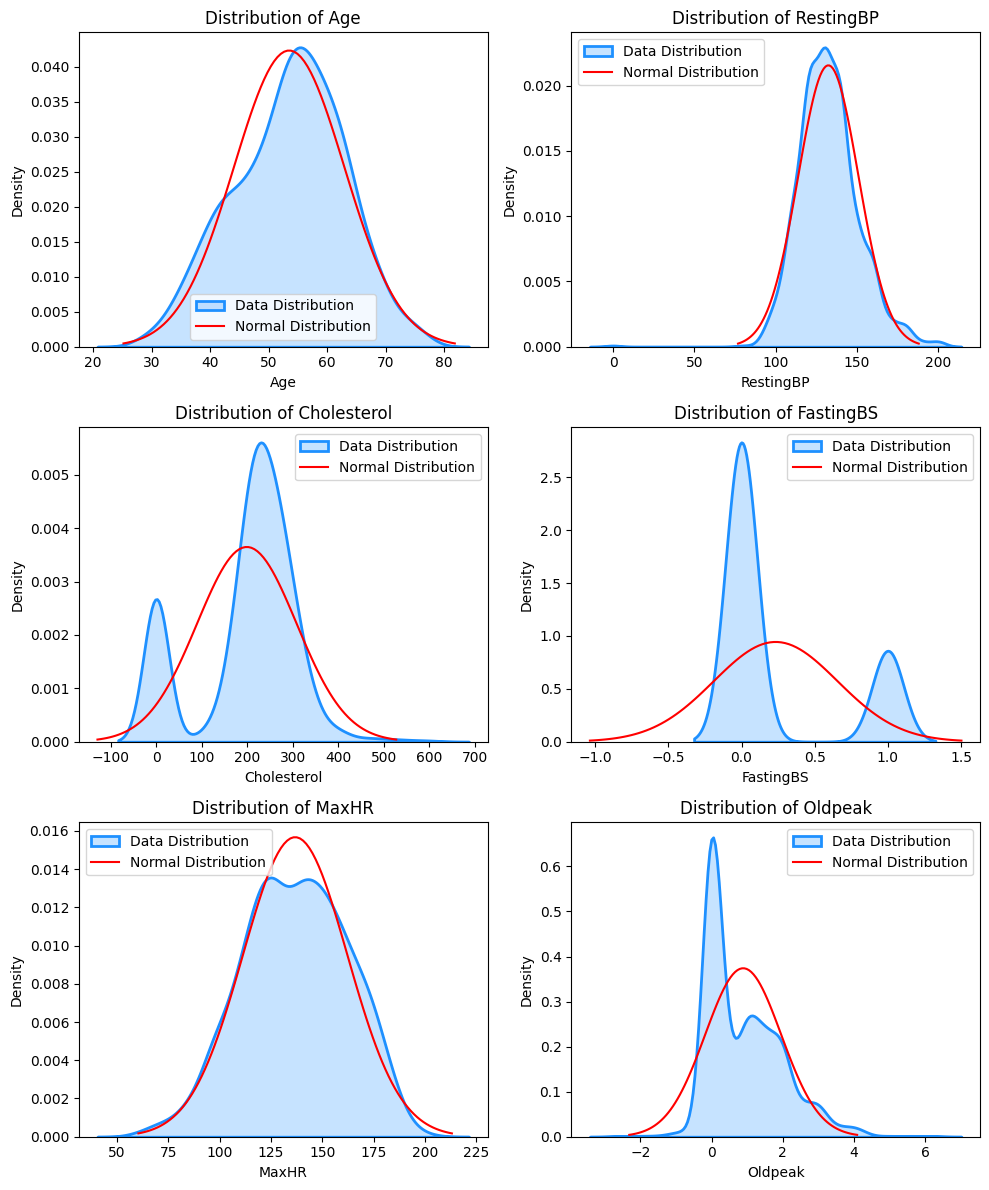

In [23]:
num_features = len(numerical_data.columns)
cols = 2  
rows = (num_features + cols - 1) // cols  
fig, axes = plt.subplots(rows, cols, figsize=(10, rows * 4))  # Create the subplot grid
axes = axes.flatten() 
for i, feature in enumerate(numerical_data.columns):
    sns.kdeplot(
        data=df,
        x=feature,
        color='dodgerblue',
        fill=True,
        label="Data Distribution",
        shade=True,
        linewidth=2,
        ax=axes[i]
    )

    mean = df[feature].mean()
    std = df[feature].std()

    x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
    y = stats.norm.pdf(x, mean, std)

    axes[i].plot(x, y, color="red", label="Normal Distribution")

    axes[i].set_title(f"Distribution of {feature}")
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<a id="feature-insights"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Phân Phối Đặc Trưng và Những Thông Tin Quan Trọng
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f0f8ff; padding: 15px; border-radius: 8px; border: 1px solid #bbb; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: decimal; padding-left: 20px; color: #333;">
    <li><b>Tuổi:</b> Phân phối của đặc trưng này gần như theo một đường cong chuẩn, cho thấy ít cần phải xử lý trước. Đặc trưng này có thể hoạt động tốt như một biến liên tục trong hầu hết các mô hình.</li>
    <li><b>Huyết áp khi nghỉ (RestingBP):</b> Có một chút lệch khỏi phân phối chuẩn, với một độ lệch nhỏ về phía phải.</li>
    <li><b>Cholesterol:</b> Phân phối có hình dạng đơn đỉnh và gần như chuẩn, nhưng có một số đuôi khá rõ rệt.</li>
    <li><b>Đường huyết lúc đói (FastingBS):</b> Đây có vẻ là một đặc trưng rời rạc, chủ yếu tập trung vào 0 và 1 (nhị phân). Nó có thể cần được xử lý như một biến phân loại thay vì liên tục.</li>
    <li><b>Tốc độ tim tối đa đạt được (MaxHR):</b> Đặc trưng này cũng giống như phân phối chuẩn, với một chút lệch về phía trái. Nó phù hợp với các mô hình giả định phân phối chuẩn, nhưng có thể cải thiện tính đối xứng nếu thực hiện chuẩn hóa thêm.</li>
    <li><b>Oldpeak:</b> Đặc trưng này có sự lệch mạnh, với hầu hết các giá trị tập trung quanh 0. Đặc trưng này có thể được cải thiện bằng các phép biến đổi (ví dụ: logarit hoặc Box-Cox) để giảm độ lệch và làm phân phối trở nên đối xứng hơn.</li>
</ul>

</div>

<a id="4"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Statistical Analysis🧩</div>


<a id="4.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">QQ-Plot</div>


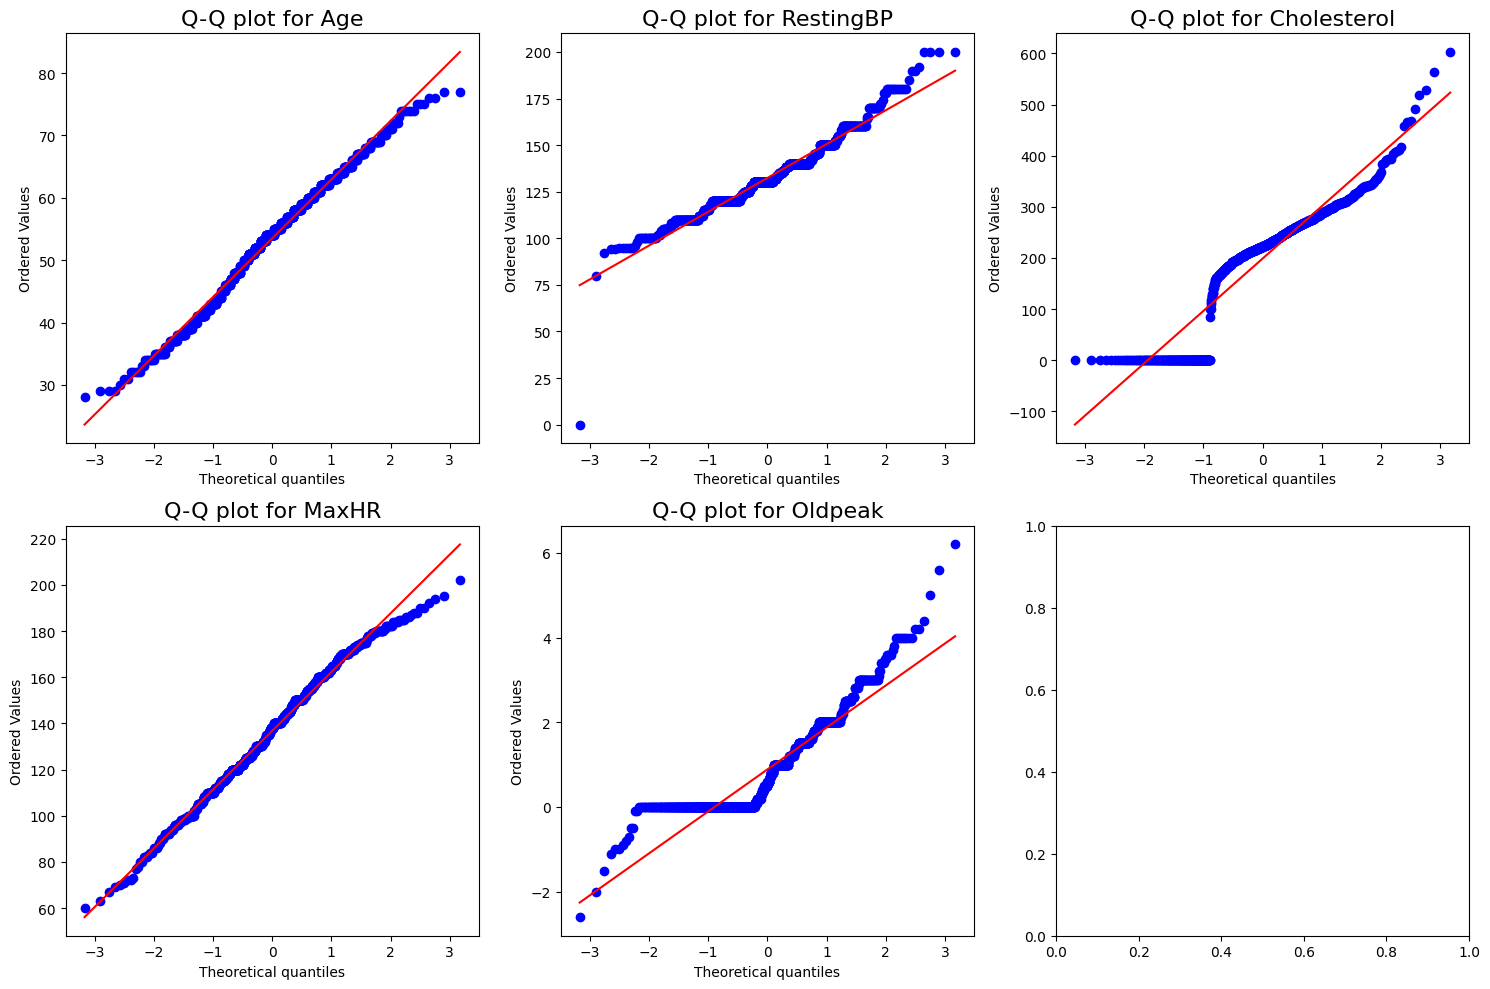

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()  # Chuyển 2D array thành 1D list

# Loop qua các cột trong 'col2' để vẽ Q-Q plot
for i, ax in zip(col2, axes):  
    stats.probplot(df[i], dist="norm", plot=ax)
    ax.set_title(f"Q-Q plot for {i}", fontsize=16)

plt.tight_layout()  # Tự động căn chỉnh layout
plt.show()

<a id="feature-insights"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Feature Insights
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f0f8ff; padding: 15px; border-radius: 8px; border: 1px solid #bbb; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: decimal; padding-left: 20px; color: #333;">
    <li><b>Tuổi:</b> Biến "Tuổi" có phân phối gần chuẩn, mặc dù sự lệch nhỏ ở hai đuôi có thể gợi ý một chút độ lệch.</li>
    <li><b>Huyết áp khi nghỉ (RestingBP):</b> "RestingBP" không theo phân phối chuẩn. Sự lệch ở đầu dưới cho thấy sự hiện diện của các ngoại lệ hoặc hiệu ứng sàn.</li>
    <li><b>Cholesterol:</b> "Cholesterol" có phân phối lệch mạnh hoặc không chuẩn, có thể do các giá trị bị thiếu hoặc giá trị bằng không được mã hóa không đúng.</li>
    <li><b>Tốc độ tim tối đa đạt được (MaxHR):</b> "MaxHR" gần như theo phân phối chuẩn, với một vài ngoại lệ hoặc độ lệch nhỏ ở phạm vi cao hơn.</li>
    <li><b>Oldpeak:</b> "Oldpeak" không chuẩn, với phân phối lệch rõ ràng và có thể có hiệu ứng sàn (các giá trị gần 0).</li>
    <li><b>Đường huyết lúc đói (FastingBS):</b> "FastingBS" rõ ràng không theo phân phối chuẩn.</li>
</ul>

</div>


<a id="4.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Shapiro-Wild Test</div>


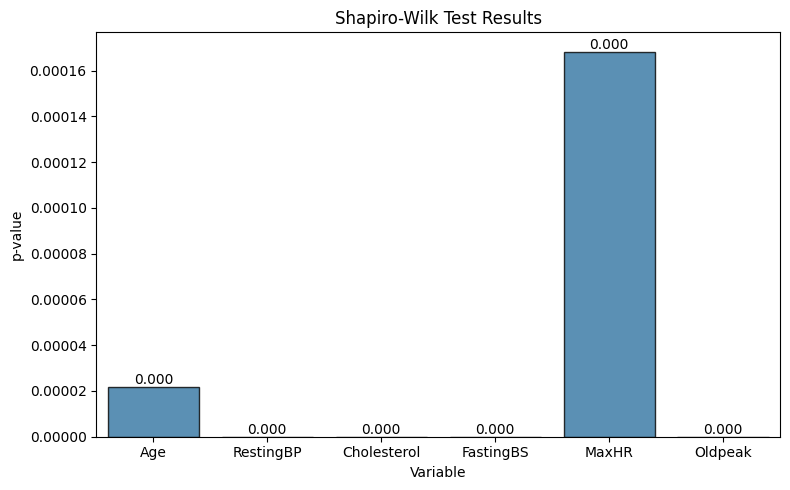

,Variable,Test Statistic,p-value
0,Age,0.991012,2.165168e-05
1,RestingBP,0.958043,1.494811e-15
2,Cholesterol,0.870595,6.976265e-27
3,FastingBS,0.523460,3.762033e-44
4,MaxHR,0.992672,1.683352e-04
5,Oldpeak,0.859879,8.271839e-28


In [25]:
shapiro_wilk_results = pd.DataFrame(columns=["Variable", "Test Statistic", "p-value"])
for feature in numerical_data.columns:
    data = df[feature]
    statistic, p_value = stats.shapiro(data)
    temp_df = pd.DataFrame({"Variable": [feature], "Test Statistic": [statistic], "p-value": [p_value]})
    shapiro_wilk_results = pd.concat([shapiro_wilk_results, temp_df], ignore_index=True)
fig, ax = plt.subplots(figsize=(8, 5))
barplot = sns.barplot(data=shapiro_wilk_results, x="Variable", y="p-value", edgecolor="black", alpha=0.8)
ax.set_xlabel("Variable")
ax.set_ylabel("p-value")
ax.set_title("Shapiro-Wilk Test Results")
for p in barplot.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, f"{height:.3f}", ha="center", va="bottom")
plt.tight_layout()
plt.show()
display(shapiro_wilk_results)


<a id="key-observations"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Key Observations: p-value Interpretation
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: decimal; padding-left: 20px; color: #333;">
    <li><b>Giải Thích p-value:</b>
        <ul style="list-style-type: square; padding-left: 20px;">
            <li>p-value < 0.05 chỉ ra rằng giả thuyết vô hiệu (dữ liệu tuân theo phân phối chuẩn) bị bác bỏ, nghĩa là biến này không tuân theo phân phối chuẩn.</li>
            <li>p-value ≥ 0.05 cho thấy biến này có thể tuân theo phân phối chuẩn.</li>
        </ul>
    </li>
    <li><b>Tuổi (p-value = 0.007):</b> p-value nhỏ hơn 0.05 một chút, vì vậy Tuổi không tuân theo phân phối chuẩn hoàn hảo.</li>
    <li><b>Huyết áp khi nghỉ (RestingBP) (p-value ≈ 0):</b> p-value cực kỳ thấp, cho thấy sự sai lệch mạnh khỏi phân phối chuẩn. Cần xem xét việc chuyển đổi logarit hoặc chuẩn hóa để xử lý độ lệch.</li>
    <li><b>Cholesterol (p-value = 0.002):</b> Biến này không tuân theo phân phối chuẩn.</li>
    <li><b>Đường huyết lúc đói (FastingBS) (p-value ≈ 0):</b> Biến này là nhị phân, vì vậy bài kiểm tra tính chuẩn không có ý nghĩa ở đây.</li>
    <li><b>Tốc độ tim tối đa đạt được (MaxHR) (p-value = 0.000035):</b> Biến này không tuân theo phân phối chuẩn.</li>
    <li><b>Oldpeak (p-value ≈ 0):</b> Dữ liệu này có sự sai lệch mạnh khỏi phân phối chuẩn.</li>
</ul>

</div>


<a id="4.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Bi-Variate Analysis</div>


<a id="continuous_vs_target"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 15px; font-weight: bold; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    📊 How Continuous Variables Vary in Relation to the Target Variable
</div>

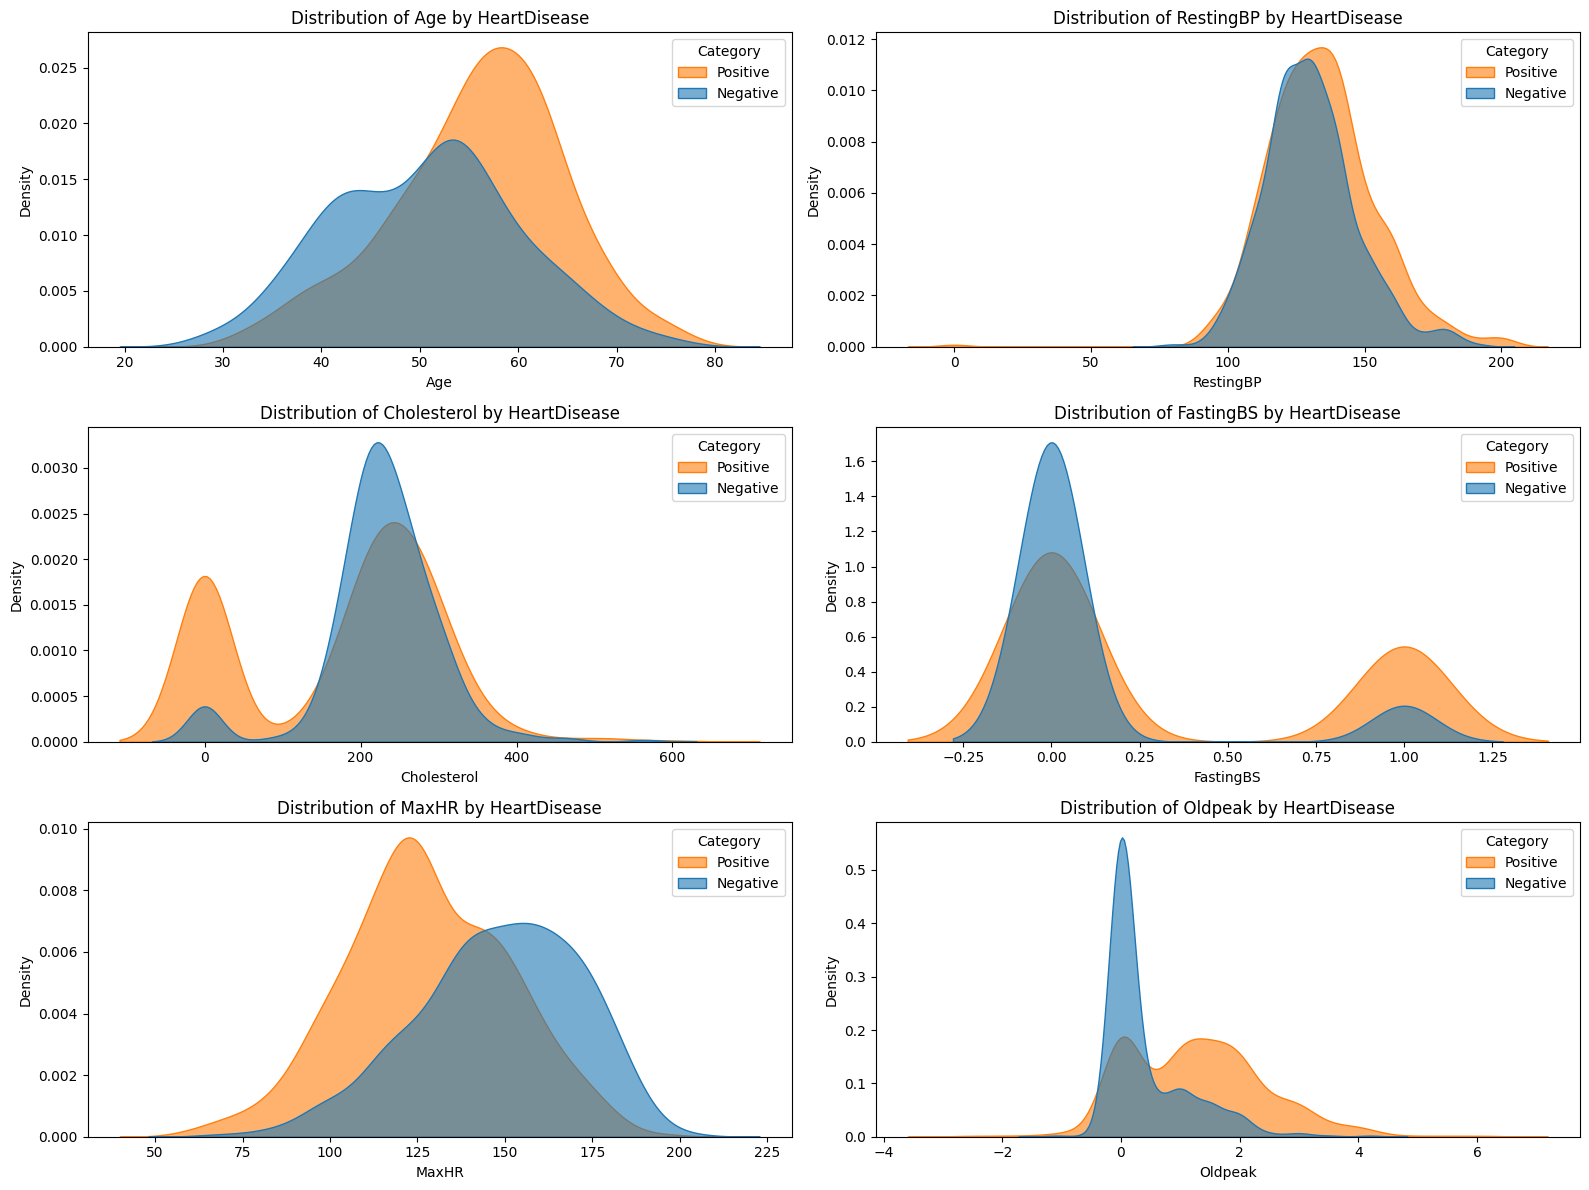

In [26]:
# Number of numerical columns
numerical_columns = numerical_data.columns.tolist()
num_cols = len(numerical_columns)

# Set the number of rows and columns for the subplots grid
rows = (num_cols // 2) + (num_cols % 2)  # 2 columns per row
cols = 2

# Create a figure for the subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 4 * rows))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy indexing

# Loop through each numerical column and plot in a subplot
for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=col, hue='HeartDisease', fill=True, ax=axes[idx], alpha=0.6)
    axes[idx].set_title(f"Distribution of {col} by HeartDisease")
    axes[idx].legend(title="Category", labels=['Positive', 'Negative'])
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel("Density")

# Remove unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.savefig('Looking feature Insights.png', dpi=300, bbox_inches='tight')  # Save as PNG

plt.tight_layout()
plt.show()

<a id="takeaways"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Những Điều Rút Ra Quan Trọng
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: disc; padding-left: 20px; color: #333">
    <li><b>Phân phối của nhóm có và không có bệnh tim có sự chồng lấn,</b> nhưng nhóm có bệnh tim có đỉnh ở độ tuổi hơi cao hơn.</li>
    <li><b>Nhịp tim tối đa thấp hơn</b> có liên quan đến bệnh tim, điều này cho thấy đây có thể là một yếu tố dự đoán mạnh.</li>
    <li><b>Giá trị "Oldpeak" cao hơn</b> có liên quan chặt chẽ với bệnh tim, khiến đây trở thành một đặc trưng tiềm năng quan trọng.</li>
    <li><b>Đường huyết lúc đói (FastingBS) cho thấy mối liên hệ mạnh với tình trạng bệnh tim,</b> vì sự phân phối giữa các nhóm có sự khác biệt rõ rệt. Những người có mức đường huyết lúc đói cao (giá trị = 1) có khả năng mắc bệnh tim cao hơn.</li>
    <li><b>Huyết áp khi nghỉ (RestingBP) có sự chồng lấn,</b> cho thấy khả năng dự đoán hạn chế nếu chỉ sử dụng nó, nhưng có thể có giá trị khi kết hợp với các đặc trưng khác.</li>
    <li><b>Cholesterol cần được xử lý cẩn thận</b> do sự xuất hiện của nhiều giá trị bằng không.</li>
</ul>

</div>


<a id="continuous_vs_target"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 15px; font-weight: bold; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    📊 How mean of features relate with heart disease ??</div>

In [27]:
positive = df[df["HeartDisease"] == 1]
negative = df[df["HeartDisease"] == 0]

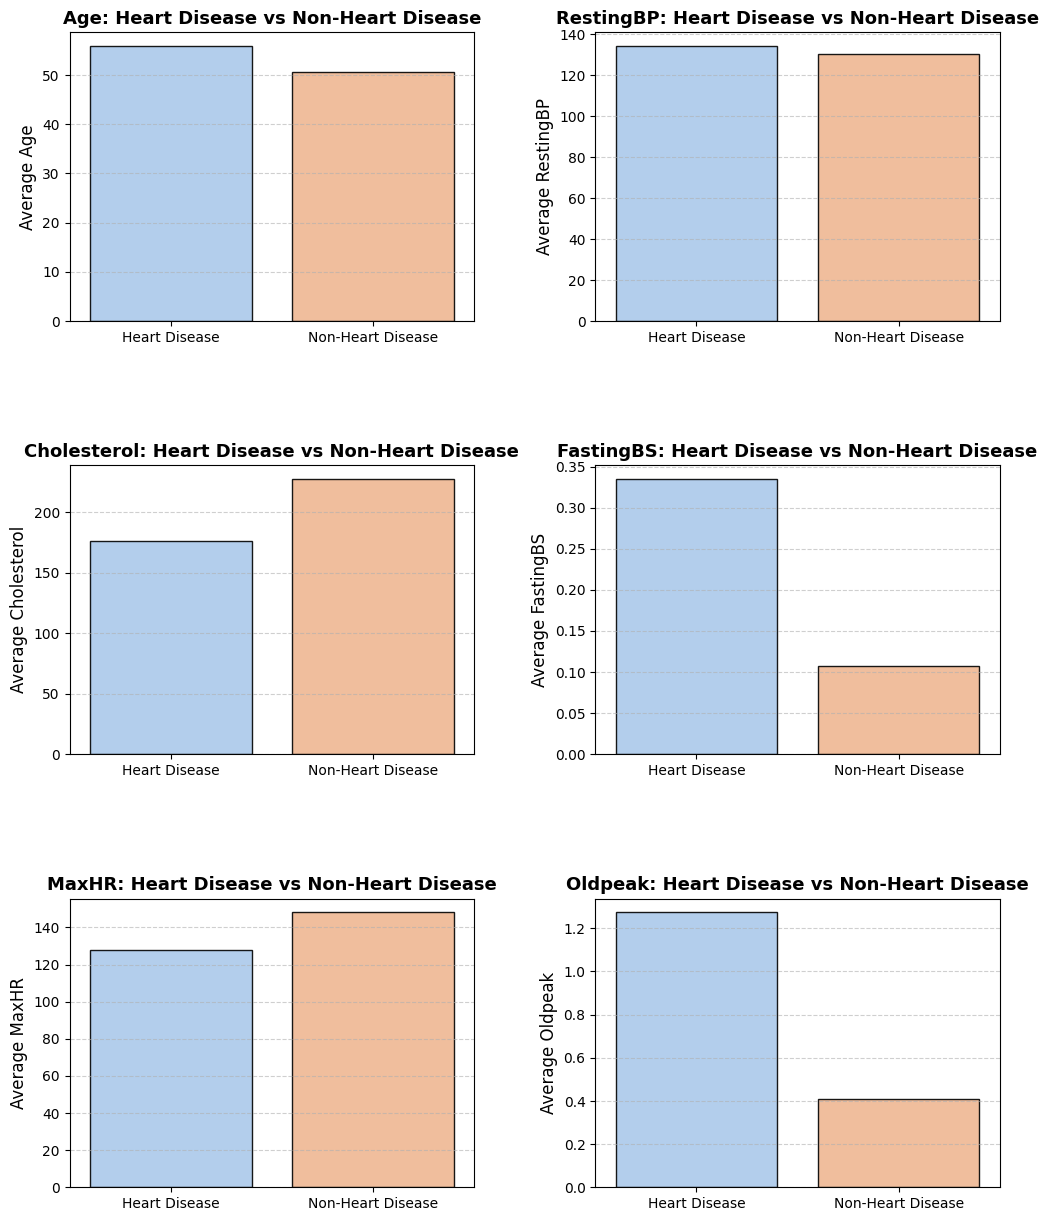

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Flatten axes để dễ lặp
axes = axes.flatten()

# Lặp qua từng feature
for i, feature in enumerate(numerical_data):
    avg_heart_failure = positive[feature].mean()
    avg_non_heart_failure = negative[feature].mean()

    # Vẽ barplot
    sns.barplot(
        x=["Heart Disease", "Non-Heart Disease"],
        y=[avg_heart_failure, avg_non_heart_failure],
        ax=axes[i],
        palette=sns.color_palette("pastel")[:2],  # Chỉ lấy 2 màu đầu tiên
        edgecolor="black",
        alpha=0.9
    )
    axes[i].set_ylabel(f"Average {feature}", fontsize=12)
    axes[i].set_title(f"{feature}: Heart Disease vs Non-Heart Disease", fontsize=13, fontweight="bold")

    # Thêm grid nhẹ để dễ đọc dữ liệu
    axes[i].grid(axis="y", linestyle="--", alpha=0.6)

# Xóa subplot trống nếu số lượng feature lẻ
if len(numerical_data) % 2 != 0:
    fig.delaxes(axes[len(numerical_data)])  # Đảm bảo xóa đúng subplot

# Điều chỉnh khoảng cách giữa các subplot
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Hiển thị
plt.show()


<a id="5"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Feature Engineering And Scaling🧩</div>


<a id="5.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Feature-Scaling</div>


In [29]:
copy_df = df.copy(deep=True)
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
for i in numerical_data.columns.tolist() :
  min_max_scaler_df = min_max_scaler.fit_transform(copy_df[[i]])
  standard_scaler_df = standard_scaler.fit_transform(min_max_scaler_df)
  copy_df[i] = standard_scaler_df.flatten()

df= copy_df

In [30]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0


<a id="5.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Categorical Data Encoding</div>

In [31]:
from sklearn.preprocessing  import LabelEncoder
encoder = LabelEncoder()

for i in categorical_data.columns.tolist():
  copy_df[i] = encoder.fit_transform(copy_df[i])

copy_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,-0.832432,2,0
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,-0.832432,2,0
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,1,3,-1.210356,0.596393,-0.551341,1,-0.188999,0,0.293283,1,1
914,1.536902,1,0,0.627078,-0.053049,1.813758,1,0.164684,0,2.357094,1,1
915,0.370100,1,0,-0.129513,-0.620168,-0.551341,1,-0.857069,1,0.293283,1,1
916,0.370100,0,1,-0.129513,0.340275,-0.551341,0,1.461525,0,-0.832432,1,1


<a id="6"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Feature Importance Analysis Using Inferential Statistics🧩</div>

<a id="6.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">ANOVA</div>

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
import os
continuous_feature_names= numerical_data.columns.tolist()

In [33]:
selector = SelectKBest(score_func = f_classif , k='all')
fit = selector.fit(copy_df[numerical_data.columns.tolist()],copy_df['HeartDisease'])
anova_score = pd.DataFrame(data = fit.scores_ , index = numerical_data.columns.tolist() , columns = ['F-value'])
anova_score['p-value'] = fit.pvalues_
anova_score['significant'] = anova_score['p-value'] < 0.05
anova_score = anova_score.sort_values(by = 'F-value', ascending = False)
anova_score

,F-value,p-value,significant
Oldpeak,178.615120,2.390772e-37,True
MaxHR,174.913585,1.137786e-36,True
Age,79.160779,3.007953e-18,True
FastingBS,70.478543,1.753598e-16,True
Cholesterol,52.459725,9.308309e-13,True
RestingBP,10.727228,1.095315e-03,True


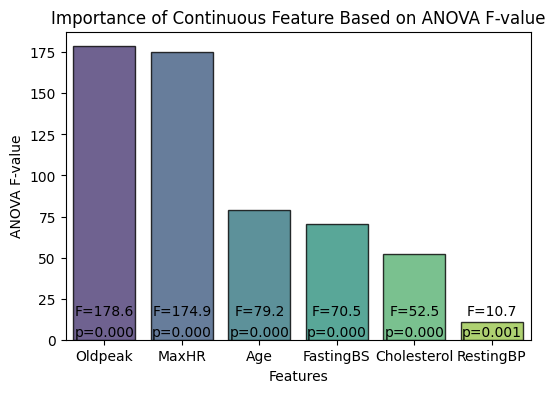

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
barplot = sns.barplot(x=anova_score.index, y=anova_score["F-value"], palette="viridis", edgecolor="black", alpha=0.8)
ax.set_title("Importance of Continuous Feature Based on ANOVA F-value")
ax.set_xlabel("Features")
ax.set_ylabel('ANOVA F-value')

for i, (p_value, f_value) in enumerate(zip(anova_score['p-value'], anova_score["F-value"])):
    barplot.text(i, 15, f'F={f_value:.1f}', color='black', ha='center')
    barplot.text(i, 2, f'p={p_value:.3f}', color='black', ha='center')
os.makedirs("visualizations", exist_ok=True)
plt.savefig(os.path.join("visualizations", "ANOVA_results.png"), dpi=300)
plt.show()

<a id="insights"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    🔑 Những Thông Tin Quan Trọng
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: disc; padding-left: 20px; color: #333">
    <li><b>Tất cả các biến liên tục</b> đều có ảnh hưởng đáng kể đến biến mục tiêu.</li>
</ul>

</div>

<a id="6.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Chi-Squared Test</div>

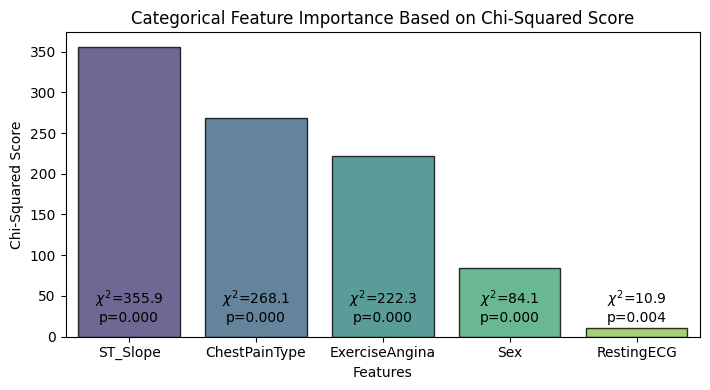

,Chi-Squared Score,p-value,Degrees of Freedom,significant
ST_Slope,355.918443,0.0,2,True
ChestPainType,268.067239,0.0,3,True
ExerciseAngina,222.259383,0.0,1,True
Sex,84.145101,0.0,1,True
RestingECG,10.931469,0.004229,2,True


In [35]:
categorical_feature_names= categorical_data.columns.tolist()
chisquare_scores = pd.DataFrame(index=categorical_data.columns.tolist(), columns=["Chi-Squared Score", "p-value", "Degrees of Freedom"])
for feature in categorical_feature_names:
    contingency_table = pd.crosstab(df[feature], df["HeartDisease"])
    chi2, p, dof, _ = stats.chi2_contingency(contingency_table)

    chisquare_scores.loc[feature, "Chi-Squared Score"] = chi2
    chisquare_scores.loc[feature, "p-value"] = p
    chisquare_scores.loc[feature, "Degrees of Freedom"] = dof

chisquare_scores["significant"] = chisquare_scores["p-value"] < 0.05
chisquare_scores = chisquare_scores.sort_values(by="Chi-Squared Score", ascending=False)



fig, ax = plt.subplots(1, 1, figsize=(7.2, 4))
barplot = sns.barplot(x=chisquare_scores.index, y=chisquare_scores["Chi-Squared Score"], palette="viridis", ax=ax, edgecolor="black", alpha=0.8)
ax.set_title("Categorical Feature Importance Based on Chi-Squared Score")
ax.set_xlabel("Features")
ax.set_ylabel("Chi-Squared Score")

# Annotate each bar with its Chi-Squared score and p-value
for i, (p_value, chi2_score) in enumerate(zip(chisquare_scores["p-value"], chisquare_scores["Chi-Squared Score"])):
    chi2_str = f'$\chi^2$={chi2_score:.1f}'  # Chi-squared symbol with exponent using LaTeX
    barplot.text(i, 40, chi2_str, color="black", ha="center")
    barplot.text(i, 18, f"p={p_value:.3f}", color="black", ha="center")

plt.tight_layout()
plt.savefig(os.path.join("visualizations", "chi_sq_results.png"), dpi=300)
plt.show()

chisquare_scores

<a id="chi_squared_takeaways"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 22px; font-weight: bold; border-radius: 8px; margin-bottom: 15px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    📊 Những Điều Rút Ra Từ Kiểm Định Chi-Squared
</div>

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.8; background: #f9f9f9; padding: 15px; border-radius: 8px; border: 1px solid #ddd; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.1);">

<ul style="list-style-type: disc; padding-left: 20px; color: #333">
    <li><b>Tất cả các biến phân loại</b> đều có ảnh hưởng đáng kể đến biến mục tiêu.</li>
    <li><b>ECG khi nghỉ</b> có p-value không thấp hơn nhiều so với 0.05, cho thấy có thể loại bỏ biến này khỏi mô hình mặc dù nó có ý nghĩa thống kê. Nếu tôi phải loại bỏ một đặc trưng, đây sẽ là ứng viên tốt nhất.</li>
</ul>

</div>


<a id="7"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Model-Building🧩</div>

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score , f1_score, recall_score ,classification_report, confusion_matrix

In [37]:
X= copy_df.drop('HeartDisease',axis=1)
y= copy_df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [38]:
def result(y_true , y_pred , models_df , name):
  cm = confusion_matrix(y_true, y_pred )
  TP = cm[1][1]
  TN = cm[0][0]
  FP = cm[0][1]
  FN = cm[1][0]

  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

  ans = pd.DataFrame({"experiment_name": [name], "predictions": [y_pred.tolist()], "accuracy": [accuracy],
         "precision": [precision], "recall": [recall], "f1": [f1], "specificity": [specificity],
                                                    "confusion_matrix": [cm]})
  return ans;

In [39]:
def make_confusion_matrix(y_true, y_pred, labels=None, model_name="Model"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True,
                xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix of {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

In [40]:
models_df = pd.DataFrame({"experiment_name": [], "predictions": [], "accuracy": [], "precision": [], "recall": [], "f1": [], "specificity": [], "confusion_matrix": []})
models_df["predictions"] = models_df["predictions"].astype(object)  # this line is needed to enable numpy arrays to enter the "predictions" column
models_df["confusion_matrix"] = models_df["confusion_matrix"].astype(object)  # this line is needed to enable numpy arrays to enter the "predictions" column
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix


<a id="7.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Model Building Using 7 Models</div>

In [41]:
from sklearn.model_selection import cross_val_score ,GridSearchCV
from sklearn.linear_model import LogisticRegression , LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [42]:
lr=LogisticRegression()
rf=RandomForestClassifier()
svc=SVC()
knn=KNeighborsClassifier()
nb=GaussianNB()
dt=DecisionTreeClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [43]:
def train_models( models, x_train, y_train):
    models_df = pd.DataFrame({"experiment_name": [], "predictions": [], "accuracy": [], "precision": [], "recall": [], "f1": [], "specificity": [], "confusion_matrix": []})
    for name, model in models.items():
        print()
        print(f"Training {name}...")
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        print(f"{name} training done.")
        models_df = pd.concat([models_df , result(y_test , y_pred , models_df , name) ] , ignore_index=True)

    return models_df


In [44]:
models = {
    'Logistic Regression': lr ,
    'Random Forest': rf,
    'Support Vector Machine': svc,
    'K-Nearest Neighbors': knn,
    'Naive Bayes': nb,
    'Decision Tree': dt,
    'Gradient Boosting': gb,
    'XGBoost': xgb
}
models_df = pd.concat([models_df , train_models(models ,x_train , y_train ) ] , ignore_index=True)


Training Logistic Regression...
Logistic Regression training done.

Training Random Forest...
Random Forest training done.

Training Support Vector Machine...
Support Vector Machine training done.

Training K-Nearest Neighbors...
K-Nearest Neighbors training done.

Training Naive Bayes...
Naive Bayes training done.

Training Decision Tree...
Decision Tree training done.

Training Gradient Boosting...
Gradient Boosting training done.

Training XGBoost...
XGBoost training done.


In [45]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.798913,0.901099,0.745455,0.815920,0.878378,"[[65, 9], [28, 82]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"


In [46]:
models_df.sort_values(by='accuracy', ascending=False)

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.798913,0.901099,0.745455,0.815920,0.878378,"[[65, 9], [28, 82]]"


<a id="7.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">Model Building by dealing Missings</div>

<a id="continuous_vs_target"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 15px; font-weight: bold; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    📊  Trying to improve models by dealing with missing cholesterol values </div>

In [47]:
df['Cholesterol'].describe()

count    9.180000e+02
mean    -2.786442e-16
std      1.000545e+00
min     -1.818435e+00
25%     -2.337038e-01
50%      2.213632e-01
75%      6.238346e-01
max      3.697252e+00
Name: Cholesterol, dtype: float64

In [48]:
df[df['Cholesterol'] != 0]['Cholesterol'].describe()

count    9.180000e+02
mean    -2.786442e-16
std      1.000545e+00
min     -1.818435e+00
25%     -2.337038e-01
50%      2.213632e-01
75%      6.238346e-01
max      3.697252e+00
Name: Cholesterol, dtype: float64

In [49]:
mean_imputed_df = df.copy(deep=True)
mean_imputed_df['FastingBS']=df['FastingBS'].astype(int)
mean_imputed_df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].mean())
mean_imputed_df['Cholesterol'].describe()

count    9.180000e+02
mean    -2.786442e-16
std      1.000545e+00
min     -1.818435e+00
25%     -2.337038e-01
50%      2.213632e-01
75%      6.238346e-01
max      3.697252e+00
Name: Cholesterol, dtype: float64

In [50]:
im_lr=LogisticRegression()
im_rf=RandomForestClassifier()
im_svc=SVC()
im_knn=KNeighborsClassifier()
im_nb=GaussianNB()
im_dt=DecisionTreeClassifier()
im_gb=GradientBoostingClassifier()
im_xgb=XGBClassifier()

In [51]:
models = {
    'Imputed Logistic Regression': im_lr ,
    'Imputed Random Forest': im_rf,
    'Imputed Support Vector Machine': im_svc,
    'Imputed K-Nearest Neighbors': im_knn,
    'Imputed Naive Bayes': im_nb,
    'Imputed Decision Tree': im_dt,
    'Imputed Gradient Boosting': im_gb,
    'Imputed XGBoost': im_xgb
}


In [52]:
X= mean_imputed_df.drop('HeartDisease',axis=1)
y= mean_imputed_df['HeartDisease']
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [53]:
models_df = pd.concat([models_df , train_models(models ,x_train , y_train ) ] , ignore_index=True)


Training Imputed Logistic Regression...
Imputed Logistic Regression training done.

Training Imputed Random Forest...
Imputed Random Forest training done.

Training Imputed Support Vector Machine...
Imputed Support Vector Machine training done.

Training Imputed K-Nearest Neighbors...
Imputed K-Nearest Neighbors training done.

Training Imputed Naive Bayes...
Imputed Naive Bayes training done.

Training Imputed Decision Tree...
Imputed Decision Tree training done.

Training Imputed Gradient Boosting...
Imputed Gradient Boosting training done.

Training Imputed XGBoost...
Imputed XGBoost training done.


In [54]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.798913,0.901099,0.745455,0.815920,0.878378,"[[65, 9], [28, 82]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.885870,0.900901,0.909091,0.904977,0.851351,"[[63, 11], [10, 100]]"


<a id="8"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩HyperParameter Tunning🧩</div>

<a id="8.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">For Decision Tree</div>

In [55]:
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"],
    "max_leaf_nodes": [None, 10, 20, 50]
}

In [56]:
grid_search = GridSearchCV(estimator= DecisionTreeClassifier(),param_grid=param_grid,
                           scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': [None, 'sqrt', 'log2'],
                         'max_leaf_nodes': [None, 10, 20, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [57]:
print("Best hyperparameters:", grid_search.best_params_)

# Best model
best_dt_model = grid_search.best_estimator_
best_dt_model.fit(x_train, y_train)
predictions = best_dt_model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
models_df = pd.concat([models_df , train_models({'Tunned DecisionTree': best_dt_model} ,x_train , y_train ) ] , ignore_index=True)
# models_df = pd.concat([models_df , train_models(best_dt_model ,x_train , y_train ) ] , ignore_index=True)
print("Accuracy:", accuracy)

Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 5}

Training Tunned DecisionTree...
Tunned DecisionTree training done.
Accuracy: 0.8695652173913043


In [58]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.798913,0.901099,0.745455,0.815920,0.878378,"[[65, 9], [28, 82]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.885870,0.900901,0.909091,0.904977,0.851351,"[[63, 11], [10, 100]]"


<a id="8.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">For Random Forest</div>

In [59]:
random_param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [60]:
rf_grid_search = GridSearchCV( estimator=best_dt_model,param_grid=param_grid,
                           scoring="accuracy", cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Accuracy: 0.8419904948280683


In [61]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"Tunned Random Forest": best_rf} ,x_train , y_train ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training Tunned Random Forest...
Tunned Random Forest training done.
Accuracy: 0.842391304347826


In [62]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.798913,0.901099,0.745455,0.815920,0.878378,"[[65, 9], [28, 82]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.885870,0.900901,0.909091,0.904977,0.851351,"[[63, 11], [10, 100]]"


<a id="8.3"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">For XGBoost</div>

In [63]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 1],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'lambda': [0, 1, 10],
    'alpha': [0, 0.1, 1, 10]
}

In [64]:
from sklearn.model_selection import RandomizedSearchCV

In [65]:
xgb_random_search = RandomizedSearchCV( estimator=xgb, param_distributions=param_grid, n_iter=50,
    scoring='accuracy', cv=5, verbose=2,random_state=42, n_jobs=-1)
xgb_random_search.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 1, 10],
                                        'gamma': [0, 0.1, 0.2, 0.3, 1],
                                        'lambda': [0, 1, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.6, 0.7, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [66]:
best_xgb = xgb_random_search.best_estimator_
y_pred = best_xgb.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"Tunned XG Boost": best_xgb} ,x_train , y_train ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training Tunned XG Boost...
Tunned XG Boost training done.
Accuracy: 0.8804347826086957


In [67]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.798913,0.901099,0.745455,0.815920,0.878378,"[[65, 9], [28, 82]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.885870,0.900901,0.909091,0.904977,0.851351,"[[63, 11], [10, 100]]"


<a id="9"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Model-Building (Using BAGGING)🧩</div>

<a id="9.1"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white ; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">For SVM</div>

In [68]:
from sklearn.ensemble import BaggingClassifier

In [69]:
bg_svm = BaggingClassifier(estimator=svc, n_estimators=100, random_state=42)
bg_svm.fit(x_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=42)

In [70]:
y_pred = bg_svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"SVC(bagging)": bg_svm} ,x_train , y_train ) ] , ignore_index=True)

# models_df = pd.concat([models_df , result(y_test, predictions ,models_df, "SVC Advanced" ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training SVC(bagging)...
SVC(bagging) training done.
Accuracy: 0.8913043478260869


In [71]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.798913,0.901099,0.745455,0.815920,0.878378,"[[65, 9], [28, 82]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.885870,0.900901,0.909091,0.904977,0.851351,"[[63, 11], [10, 100]]"


<a id="9.2"></a><div style="text-align: center; background: #007BFF; font-family: 'Verdana', sans-serif; color: white; padding: 18px; font-size: 24px; font-weight: 600; line-height: 1.3; border-radius: 20px; margin-bottom: 25px; box-shadow: 0px 4px 4px rgba(0, 0, 0, 0.1);">For KNN</div>

In [72]:
bg_knn = BaggingClassifier(estimator=knn, n_estimators=100, random_state=42)
bg_knn.fit(x_train, y_train)

BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=100,
                  random_state=42)

In [73]:
y_pred = bg_knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"KNN (bagging)": bg_knn} ,x_train , y_train ) ] , ignore_index=True)

# models_df = pd.concat([models_df , result(y_test, predictions ,models_df, "KNN Advanced" ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training KNN (bagging)...
KNN (bagging) training done.
Accuracy: 0.8586956521739131


In [74]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.798913,0.901099,0.745455,0.815920,0.878378,"[[65, 9], [28, 82]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.885870,0.900901,0.909091,0.904977,0.851351,"[[63, 11], [10, 100]]"


In [75]:
bg_lr = BaggingClassifier(estimator=lr, n_estimators=100, random_state=42)
bg_lr.fit(x_train, y_train)

BaggingClassifier(estimator=LogisticRegression(), n_estimators=100,
                  random_state=42)

In [76]:
y_pred = bg_lr.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
models_df = pd.concat([models_df , train_models({"Logistic Regression (bagging)": bg_svm} ,x_train , y_train ) ] , ignore_index=True)

# models_df = pd.concat([models_df , result(y_test, predictions ,models_df, "Logistic Regresion Advanced" ) ] , ignore_index=True)
print("Accuracy:", accuracy)


Training Logistic Regression (bagging)...
Logistic Regression (bagging) training done.
Accuracy: 0.9021739130434783


<a id="10"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Model-Evaluation🧩</div>

In [77]:
models_df.sort_values(by='accuracy', ascending=False)

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
16,Tunned DecisionTree,"[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.896739,0.902655,0.927273,0.914798,0.851351,"[[63, 11], [8, 102]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
12,Imputed Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
19,SVC(bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
21,Logistic Regression (bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
15,Imputed XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"


In [78]:
models_df

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
1,Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.875000,0.891892,0.900000,0.895928,0.837838,"[[62, 12], [11, 99]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
3,K-Nearest Neighbors,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, ...",0.853261,0.880734,0.872727,0.876712,0.824324,"[[61, 13], [14, 96]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
5,Decision Tree,"[0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.798913,0.901099,0.745455,0.815920,0.878378,"[[65, 9], [28, 82]]"
6,Gradient Boosting,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, ...",0.885870,0.908257,0.900000,0.904110,0.864865,"[[64, 10], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
9,Imputed Random Forest,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.885870,0.900901,0.909091,0.904977,0.851351,"[[63, 11], [10, 100]]"


In [79]:
models_df.to_csv("Trained_model_metrics.csv", index=False)

In [80]:
models_df.sort_values(by='accuracy', ascending=False)

,experiment_name,predictions,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
16,Tunned DecisionTree,"[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, ...",0.896739,0.902655,0.927273,0.914798,0.851351,"[[63, 11], [8, 102]]"
4,Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
12,Imputed Naive Bayes,"[1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
19,SVC(bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
21,Logistic Regression (bagging),"[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, ...",0.891304,0.909091,0.909091,0.909091,0.864865,"[[64, 10], [10, 100]]"
15,Imputed XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"
7,XGBoost,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...",0.891304,0.916667,0.900000,0.908257,0.878378,"[[65, 9], [11, 99]]"


<a id="continuous_vs_target"></a>
<div style="text-align: center; background: #009688; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 15px; font-weight: bold; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    📊 Finding the best model so far according to each metrics </div>

In [81]:
metrics_col = models_df.columns.to_list()[2:-1]
metrics_col

['accuracy', 'precision', 'recall', 'f1', 'specificity']

In [82]:
for metric in metrics_col:
    print(f"Top 3 models by {metric}")
    display(models_df.drop("predictions", axis=1).sort_values(by=metric, ascending=False).head(3))
    print("-"*50)

Top 3 models by accuracy


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by precision


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by recall


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
16,Tunned DecisionTree,0.896739,0.902655,0.927273,0.914798,0.851351,"[[63, 11], [8, 102]]"
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by f1


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
8,Imputed Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"


--------------------------------------------------
Top 3 models by specificity


,experiment_name,accuracy,precision,recall,f1,specificity,confusion_matrix
0,Logistic Regression,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
2,Support Vector Machine,0.902174,0.918182,0.918182,0.918182,0.878378,"[[65, 9], [9, 101]]"
5,Decision Tree,0.798913,0.901099,0.745455,0.815920,0.878378,"[[65, 9], [28, 82]]"


--------------------------------------------------


In [83]:
models_df.drop("predictions", axis=1).sort_values(by="accuracy", ascending=False).to_csv("model_metrics.csv", index=False)

<a id="11"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩Model-Submission🧩</div>

In [84]:
import joblib
import os

In [85]:
save_dir = 'saved_models'
os.makedirs(save_dir, exist_ok=True)
joblib.dump(lr, os.path.join(save_dir, 'Logistic Regression'))
joblib.dump(rf, os.path.join(save_dir, 'Random Forest'))
joblib.dump(svc, os.path.join(save_dir, 'Support Vector Machine'))

['saved_models\\Support Vector Machine']

<a id="12"></a>
<div style="text-align: center; background: #22177A; font-family: 'Verdana', sans-serif; color: white; padding: 15px; font-size: 28px; font-weight: bold; line-height: 1.2; border-radius: 10px; margin-bottom: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.15);"> 🧩AUTHOR'S NOTE🧩</div>

<div style="background-color:white;font-size:16px;font-family:Verdana;border-style: solid;border-color: #563A9C;border-width:4px;padding:10px;margin: 1px;color:black ;overflow:hidden"> 

💡 Cảm ơn bạn đã khám phá notebook này! 💬 Tôi rất muốn nghe ý kiến của bạn! 🙌 Nếu bạn thấy notebook này hữu ích, đừng ngần ngại để lại nhận xét hoặc chia sẻ phản hồi của bạn! 🚀 Tôi luôn sẵn sàng lắng nghe những đề xuất, cải tiến hoặc bất kỳ thông tin nào bạn có về cách chúng ta có thể phát triển phân tích này hơn nữa.

🙌 Phản hồi của bạn rất được trân trọng!</strong> Nếu bạn có bất kỳ suy nghĩ, câu hỏi hoặc nhận xét nào về phân tích này, đừng ngần ngại để lại dưới đây! Phản hồi của bạn giúp tôi cải thiện các dự án trong tương lai và cung cấp những thông tin quý giá cho cộng đồng. Hãy cảm thấy tự do khi bỏ phiếu upvote nếu bạn thích notebook này! 

👍 Điều này có ý nghĩa rất lớn và giúp cộng đồng Kaggle phát hiện những nội dung có giá trị như thế này!

Hãy tiếp tục học hỏi và xây dựng những dự án tuyệt vời cùng nhau. Chúc bạn một ngày học tập vui vẻ trên Kaggle!
    
<hr>
    
<center> <strong> Nếu bạn thích notebook này, đừng quên upvote. </str
    <br>    
<center> <strong style = 'color: red;' > ✨Chúc bạn thành công✨ </strong>
